This script plot the difference between CTRL and CUX1 KD ATAC seq signal in human CD34+ HSPC for the CUX1-promotor bound loops and non-interacting loops. The loops are identified from CD34 HiC in Zhang 2020

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy

Import the count matrix from `computeMatrix`.

In [2]:
# First two: CREs (loop region, not precise enhancer)
#CREs = pd.read_csv('CD34_ATAC_CUX1_interacting_loops_Heatmap_values.txt', header=0, sep='\t')
#loops_wo_CREs = pd.read_csv('CD34_ATAC_non_CUX1_interacting_loops_Heatmap_values.txt', header=0, sep='\t')
CREs = pd.read_csv('matrix_CREs.tab', header=0, sep='\t')
loops_wo_CREs = pd.read_csv('matrix_loops_without_CREs.tab', header=0, sep='\t')
enhancers = pd.read_csv('matrix_enhancers.tab', header=0, sep='\t')
loops_wo_enhancers = pd.read_csv('matrix_loops_without_enhancers.tab', header=0, sep='\t')
CREs

,BAMCompare_CD34_CTRL_q30_srt_nodup_noMITO,BAMCompare_CD34_CTRL_q30_srt_nodup_noMITO.1,BAMCompare_CD34_CTRL_q30_srt_nodup_noMITO.2,BAMCompare_CD34_CTRL_q30_srt_nodup_noMITO.3,BAMCompare_CD34_CTRL_q30_srt_nodup_noMITO.4,BAMCompare_CD34_CTRL_q30_srt_nodup_noMITO.5,BAMCompare_CD34_CTRL_q30_srt_nodup_noMITO.6,BAMCompare_CD34_CTRL_q30_srt_nodup_noMITO.7,BAMCompare_CD34_CTRL_q30_srt_nodup_noMITO.8,BAMCompare_CD34_CTRL_q30_srt_nodup_noMITO.9,...,BAMCompare_CD34_KD_q30_srt_nodup_noMITO.30,BAMCompare_CD34_KD_q30_srt_nodup_noMITO.31,BAMCompare_CD34_KD_q30_srt_nodup_noMITO.32,BAMCompare_CD34_KD_q30_srt_nodup_noMITO.33,BAMCompare_CD34_KD_q30_srt_nodup_noMITO.34,BAMCompare_CD34_KD_q30_srt_nodup_noMITO.35,BAMCompare_CD34_KD_q30_srt_nodup_noMITO.36,BAMCompare_CD34_KD_q30_srt_nodup_noMITO.37,BAMCompare_CD34_KD_q30_srt_nodup_noMITO.38,BAMCompare_CD34_KD_q30_srt_nodup_noMITO.39
0,1.1130,1.2850,1.7390,2.4480,3.0710,3.3540,3.0140,2.6490,2.2800,2.4770,...,0.5792,0.6832,0.3936,0.19680,0.0000,0.0000,0.0000,0.0984,0.2952,0.59040
1,0.5139,1.3110,1.9070,2.1050,1.3940,0.8533,0.6259,0.7116,0.6556,0.3426,...,0.6888,0.7760,0.8744,0.77600,0.5904,0.7760,0.7647,0.5679,0.1855,0.00000
2,0.2834,0.1713,0.7972,1.4230,1.2520,0.6259,0.0000,0.0000,0.2834,0.5667,...,0.0000,0.0000,0.3823,0.76470,0.9615,0.5792,0.1968,0.0000,0.0000,0.09277
3,0.5139,0.5139,0.3426,0.1713,0.0000,0.0000,0.9093,1.5350,1.8780,1.2520,...,0.5679,0.7647,1.5180,1.51800,1.7260,1.7490,1.7490,1.8250,1.9000,3.25600
4,0.0000,0.0000,0.0000,0.1713,0.7972,1.2250,1.3110,0.9421,1.2520,1.7330,...,1.1580,1.1580,0.7647,0.56790,0.5566,0.7422,0.5566,0.1855,0.1855,0.56790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,1.7390,1.5940,1.3380,1.2520,0.9950,1.0810,0.9685,1.3970,1.7660,2.1350,...,0.2839,0.5679,0.7647,0.67760,0.5904,0.6719,0.7534,0.7422,0.8349,0.74220
145,0.2834,0.2569,0.5139,0.7708,0.5995,0.5995,0.7972,1.1660,0.9093,0.7380,...,0.6607,0.5566,0.3711,0.09277,0.1855,0.3711,0.3711,0.3823,0.3936,0.59040
146,41.3600,45.8400,54.0000,61.6400,59.9300,51.2000,37.3200,27.1600,21.4700,17.4600,...,0.7647,0.5679,0.3823,0.19680,0.5735,0.7534,0.6550,0.4638,0.3711,0.46380
147,16.2400,12.0400,8.3150,6.5230,5.0400,4.3820,3.1300,2.3060,1.5680,0.6852,...,0.0984,0.1968,0.3823,0.38230,0.7647,0.7760,0.8744,0.5792,0.5679,0.74220


Aggregate the RPKM values for all the bins (columns) for each region.

In [3]:
CREs_CTRL = CREs.filter(regex = 'CTRL|WT').sum(axis=1)
CREs_KD = CREs.filter(regex = 'KD').sum(axis=1)
CREs_plot = pd.DataFrame({'CTRL': CREs_CTRL,'KD': CREs_KD})

In [4]:
loops_wo_CREs_CTRL = loops_wo_CREs.filter(regex = 'CTRL|WT').sum(axis=1)
loops_wo_CREs_KD = loops_wo_CREs.filter(regex = 'KD').sum(axis=1)
loops_wo_CREs_plot_no_size_match = pd.DataFrame({'CTRL': loops_wo_CREs_CTRL,'KD': loops_wo_CREs_KD})

# Size matching
loops_wo_CREs_plot = loops_wo_CREs_plot_no_size_match.sample(n = CREs_plot.shape[0])

In [5]:
enhancers_CTRL = enhancers.filter(regex = 'CTRL').sum(axis=1)
enhancers_KD = enhancers.filter(regex = 'KD').sum(axis=1)
enhancers_plot = pd.DataFrame({'CTRL': enhancers_CTRL,'KD': enhancers_KD})

In [6]:
loops_wo_enhancers_CTRL = loops_wo_enhancers.filter(regex = 'CTRL').sum(axis=1)
loops_wo_enhancers_KD = loops_wo_enhancers.filter(regex = 'KD').sum(axis=1)
loops_wo_enhancers_plot_no_size_match = pd.DataFrame({'CTRL': loops_wo_enhancers_CTRL,'KD': loops_wo_enhancers_KD})

# Size matching
loops_wo_enhancers_plot = loops_wo_enhancers_plot_no_size_match.sample(n = enhancers_plot.shape[0])

Perform statistical test

In [7]:
scipy.stats.ttest_ind(CREs_plot['CTRL'], CREs_plot['KD'])

Ttest_indResult(statistic=0.718160641097389, pvalue=0.47322469114654997)

In [8]:
scipy.stats.ttest_ind(loops_wo_CREs_plot['CTRL'], loops_wo_CREs_plot['KD'])

Ttest_indResult(statistic=0.5096336818077049, pvalue=0.6106878692028004)

In [9]:
scipy.stats.ttest_ind(enhancers_plot['CTRL'], enhancers_plot['KD'])

Ttest_indResult(statistic=3.081860289656625, pvalue=0.002097136149685753)

In [10]:
scipy.stats.ttest_ind(loops_wo_enhancers_plot['CTRL'], loops_wo_enhancers_plot['KD'])

Ttest_indResult(statistic=0.9137785071156109, pvalue=0.3609901336876584)

Plot

In [11]:
CREs_plot['sample']='CREs'
loops_wo_CREs_plot['sample']='loops_wo_CREs'
enhancers_plot['sample']='enhancers'
loops_wo_enhancers_plot['sample']='loops_wo_enhancers'

In [12]:
CREs_plot = pd.melt(CREs_plot,id_vars='sample',var_name="condition",value_name="RPKM")
loops_wo_CREs_plot = pd.melt(loops_wo_CREs_plot,id_vars='sample',var_name="condition",value_name="RPKM")
enhancers_plot = pd.melt(enhancers_plot,id_vars='sample',var_name="condition",value_name="RPKM")
loops_wo_enhancers_plot = pd.melt(loops_wo_enhancers_plot,id_vars='sample',var_name="condition",value_name="RPKM")

In [13]:
final_plot=CREs_plot.append(loops_wo_CREs_plot)
final_plot=final_plot.append(enhancers_plot)
final_plot=final_plot.append(loops_wo_enhancers_plot)
final_plot['log2_RPKM'] = np.log2(final_plot['RPKM'])

/Users/alexandregaubil/opt/anaconda3/envs/bioinformatics/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


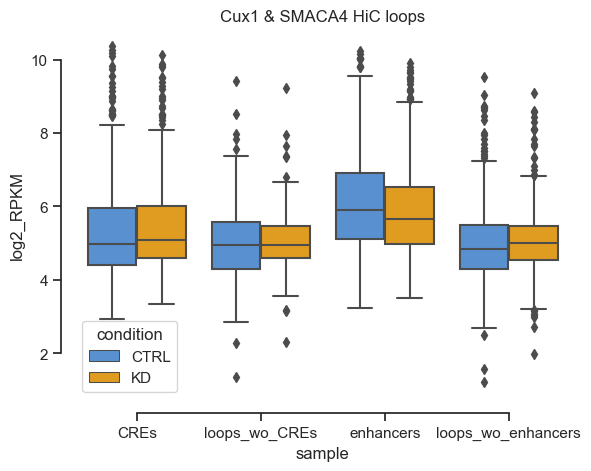

In [14]:
sns.set_theme(style="ticks")
my_pal = {"CTRL":"#448ee4","KD": "orange"}
sns.boxplot(
	x="sample", 
	y="log2_RPKM",
	hue="condition",
	palette=my_pal,
	data=final_plot
).set_title("Cux1 & SMACA4 HiC loops")
sns.despine(offset=10, trim=True)